# Preparing text to be used as "Bag of Words"

1. Split to words (Tokenizing)
2. Convert to lower case
3. Remove the stop words
4. Remove punctuation

5. (Remove HTML tags)

In [2]:
import nltk

from nltk.stem import PorterStemmer  # Other stemmers can be used e.g. for other languages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# To remove HTML tags
from bs4 import BeautifulSoup

In [ ]:
# only once!
# Download the NLTK Resources (Tokenizer & Stopwords) - 
nltk.download('punkt')

# Download STOP WORDS
nltk.download('stopwords')

In [2]:
def clean_text(text, stemmer=PorterStemmer(),
               stop_words=set(stopwords.words('english'))):
    
    # Converts to Lower Case and splits up words
    words = word_tokenize(text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words
    

# Prepare text and remove HTML

In [10]:
def clean_text_nohtml(text, stemmer=PorterStemmer(),
               stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup=BeautifulSoup(text, 'html.parser')
    cleaned_text = soup.get_text()
    
    # Converts to Lower Case and splits up words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

## Example:

In [13]:
trial_text = 'As someone that does not find great joy in completing repetitive tasks, \
I recently searched for alternatives and came across pandas-profiling <b> bold text </b>'

In [15]:
clean_text(trial_text)

['someon',
 'find',
 'great',
 'joy',
 'complet',
 'repetit',
 'task',
 'recent',
 'search',
 'altern',
 'came',
 'across',
 'b',
 'bold',
 'text']

In [14]:
clean_text_nohtml(trial_text)

['someon',
 'find',
 'great',
 'joy',
 'complet',
 'repetit',
 'task',
 'recent',
 'search',
 'altern',
 'came',
 'across',
 'bold',
 'text']

# Word cloud

In [3]:
from wordcloud import WordCloud
from PIL import Image


import numpy as np
import matplotlib.pyplot as plt

### Create a code to generate a mask from a photo with white background using PILOW

In [23]:
# Preparing the MASK
MASK_PATH = 'images/Offer.png'

icon = Image.open(MASK_PATH)
image_mask = Image.new(mode='RGB', size = icon.size, color =(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

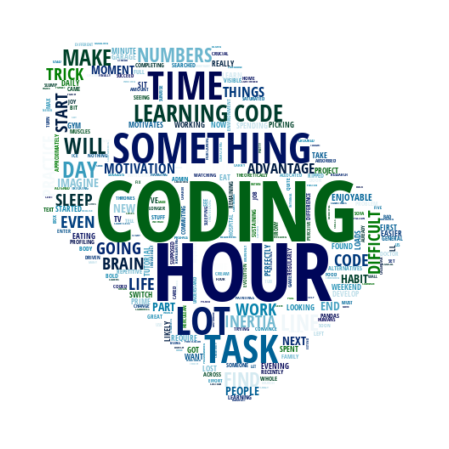

In [24]:
# it needs a simple one chunck of continuous string to work
FONT_PATH = 'images/OpenSansCondensed-Bold.ttf'

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_font_size= 300,
                      max_words=400, colormap='ocean', font_path = FONT_PATH)

word_cloud.generate(trial_text2.upper())

plt.figure(figsize=(16,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
trial_text2 = '''As someone that does not find great joy in completing repetitive tasks, \
I recently searched for alternatives and came across pandas-profiling <b> bold text </b>
Learning to code is a bit like going to the gym. Even if you max out and
spent a whole weekend at the gym, you will not see a visible difference in
your body. The more regularly you learn to code, the more likely it is that
you’ll start seeing your ripped coding muscles. (The irony is not lost on
me).
But the problem is where do you find the time? Between working your
full-time job, spending time with your family and life admin, when are you
supposed to sit down and practice this “daily coding”?
While I was working as a doctor, I spent about 12 hours at the hospital,
1-hour commuting and approximately 2 hours on general life-sustaining
stuff, such as eating. So that left me with only 9 hours remaining in my day.
Theoretically, 2 hours could be allocated to coding practice and 7 hours on
sleep. But there is nothing more difficult than trying to convince your
work-saturated brain to sit down and learn when you could be watching
Game of Thrones with a tub of ice-cream.
But then I found a trick.
As humans, we have a lot of inertia. This can be bad for us - I’m looking at
you, “24” box set. However, we can also turn it to our advantage. I found
that once I got started coding and making things, I got so absorbed into the
project, that I no longer cared about TV, food or sleep. There were quite a
few weekends when I coded until sunrise.
So how do we take advantage of this inertia? First, you must understand
that task-switching is very difficult. It requires a lot of motivation. If as soon
as you get home, you slump on the sofa and switch on the TV, you’ve
already lost that evening. This is because the amount of motivation required
to task-switch and do something not driven by evolution like eating or
sleeping is a Herculean task.
This is why the moment you enter the door and change to a new
environment is the most crucial moment. If at this moment, you tell yourself
that you are just going to do 20 minutes of coding practice, you will most
likely succeed and use your own inertia to end up learning for an hour or
more. No brain will perceive a 20-minute task as a lot of effort and you end
up tricking your brain to take advantage of your evening.
The next step is to develop a habit. Research suggests that in order to
develop a new habit, you have to carry out the task daily for a month. I’ve
used this next trick for loads of different things, from exercising to coding, it
invariably works like a charm. To preface this trick, I want you to imagine a
wall with five paintings hanging on it, four of which are perfectly aligned,
perfectly horizontal, but one is crooked. Now really imagine it, is there a part
of you that wants to fix it?
Now let’s imagine a monthly calendar with boxes representing individual
days. If you nurtured that new habit on a particular day, then you make a
line through that day. If you continued your streak the next day then you
extend that line and so on and so forth. There is something about not
breaking a continuous line that motivates most people to continue to
When I first started learning how to code, there were countless times when I
picked it up then gave up, again and again. This is a common story amongst
self-taught coders. Looking back, after teaching so many students, I finally
realise what’s going on. A lot of beginners start learning to code by picking
an arbitrary language and follow along with a bunch of tutorials. Copying
code, line by line, sometimes writing code to work out prime numbers, other
times to find all the even numbers. But you know what? I can find prime
numbers a lot faster by Googling for it and picking out even numbers is
really not all that interesting.
Here’s the truth. If you are learning to code for the sake of learning to code,
it’ll be pretty difficult for you to get good at it. Skills that require a lot of
time to hone, like programming, will eat into your pool of internal
motivation. Something from within that makes you forget to eat and sleep. I
can honestly say that coding on my own projects is one of the most
enjoyable things I do. It combines logical thinking with creativity, and at the
end, you will have made something. In most cases, something that the
world has never seen. Something that could make your life easier or more
enjoyable. Something that could make loads of people's lives easier and
more enjoyable. It’s like making a crazy-beautiful custom motorbike in your
garage, without needing the garage or spending a cent on the components.
This is what motivates most people. The creating part. The making part. So I
urge you to start learning to code by following a tutorial that makes

'''